In [0]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline 


In [90]:
from google.colab import drive
drive.mount('/content/drive') 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project18aug/data.csv')

In [92]:
data

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share .1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [0]:
data.drop(["City1 ", "City2   "  , "market leading airline","Low price airline"], axis = 1, inplace = True)

In [94]:
data

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share .1,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42
5,135.17,1204,199.02,40.68,137.97,17.09,127.69
6,152.85,2237,237.17,59.94,148.59,59.94,148.59
7,190.73,2467,191.95,17.89,205.06,16.59,174.00
8,129.35,1073,550.54,76.84,127.69,76.84,127.69
9,134.17,1130,202.93,35.40,132.91,26.40,124.78


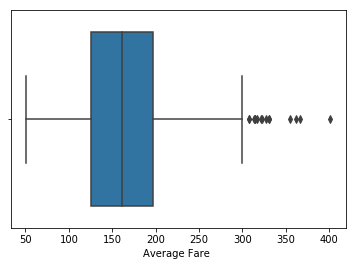

In [0]:
sns.boxplot(x=data['Average Fare ']) 

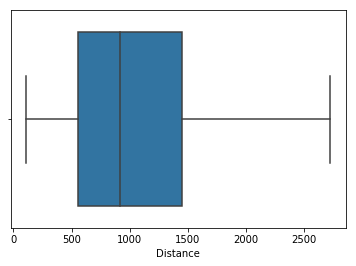

In [0]:
sns.boxplot(x=data['Distance']) 

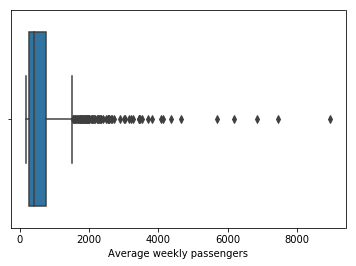

In [0]:
 sns.boxplot(x=data['Average weekly passengers'])  

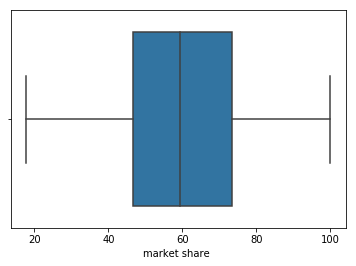

In [0]:

sns.boxplot(x=data['market share '])  

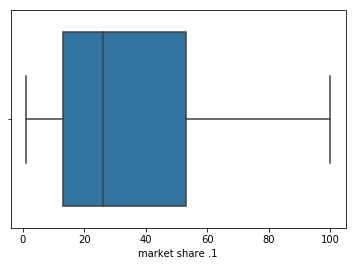

In [0]:
sns.boxplot(x=data['market share .1'])  

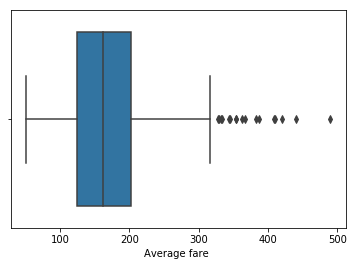

In [0]:
  sns.boxplot(x=data['Average fare '])  

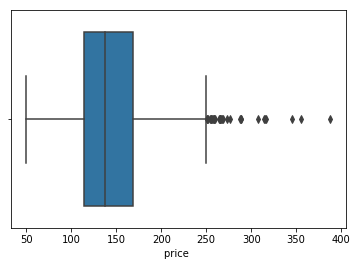

In [0]:
  sns.boxplot(x=data['price '])  

In [0]:
Q1 = np.percentile(data, 25, interpolation = 'midpoint') 

In [0]:
Q3 = np.percentile(data, 75, interpolation = 'midpoint') 

In [0]:
IQR = Q3 - Q1 

In [98]:
print(IQR)

200.38


In [0]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [0]:
from scipy import stats
import numpy as np 

In [101]:
z = np.abs(stats.zscore(data))
print(z) 

[[0.88376186 0.82281562 0.32333577 ... 0.88805083 1.31587826 0.68134108]
 [0.73919517 0.3063908  0.51614751 ... 0.69548767 0.63955964 0.51377609]
 [0.92241827 0.31883477 0.59587227 ... 0.91543248 1.17346508 0.50686631]
 ...
 [0.06153879 0.37794364 0.22387785 ... 0.1117307  0.7628822  0.33527637]
 [1.62285908 1.37346137 0.59758215 ... 1.48825391 2.40695059 1.47764552]
 [0.66329765 0.3079463  0.25665047 ... 0.58643242 0.1483755  0.45022426]]


In [102]:
data_o = data[(z < 3).all(axis=1)]
print(data_o) 

     Average Fare   Distance  ...  market share .1  price 
0           114.47       528  ...            70.19  111.03
1           122.47       860  ...            17.23  118.94
2           214.42       852  ...             2.77  167.12
3            69.40       288  ...            96.97   68.86
4           158.13       723  ...            15.34  145.42
5           135.17      1204  ...            17.09  127.69
6           152.85      2237  ...            59.94  148.59
7           190.73      2467  ...            16.59  174.00
8           129.35      1073  ...            76.84  127.69
9           134.17      1130  ...            26.40  124.78
10          212.49      1269  ...            11.91  200.93
11          173.56      1670  ...            14.37  161.39
12          170.67      1121  ...            33.87  163.22
13          120.24       580  ...            71.91  117.20
14          168.69       349  ...            39.95  149.41
15          154.40       767  ...            50.48  152.

In [103]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
market share .1,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [0]:
  #Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.
X = data_o.drop('Average fare ', axis=1) 
y = data_o[['Average fare ']] 
 


In [105]:
y


,Average fare
0,111.03
1,123.09
2,223.98
3,68.86
4,161.36
5,137.97
6,148.59
7,205.06
8,127.69
9,132.91


In [106]:
data_o.corr(method ='pearson') 

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share .1,price
Average Fare,1.000000,0.552015,-0.222121,-0.228129,0.981103,-0.476023,0.859362
Distance,0.552015,1.000000,-0.164635,-0.533325,0.526077,-0.365148,0.557689
Average weekly passengers,-0.222121,-0.164635,1.000000,0.032822,-0.190827,0.078109,-0.254185
market share,-0.228129,-0.533325,0.032822,1.000000,-0.214354,0.298800,-0.314585
Average fare,0.981103,0.526077,-0.190827,-0.214354,1.000000,-0.499622,0.817292
market share .1,-0.476023,-0.365148,0.078109,0.298800,-0.499622,1.000000,-0.249619
price,0.859362,0.557689,-0.254185,-0.314585,0.817292,-0.249619,1.000000


In [107]:
#Drop the independent variables which has less than 0.1 correlation with the dependent variable
data_o.drop(["Average weekly passengers", "market share "], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [108]:
data_o


,Average Fare,Distance,Average fare,market share .1,price
0,114.47,528,111.03,70.19,111.03
1,122.47,860,123.09,17.23,118.94
2,214.42,852,223.98,2.77,167.12
3,69.40,288,68.86,96.97,68.86
4,158.13,723,161.36,15.34,145.42
5,135.17,1204,137.97,17.09,127.69
6,152.85,2237,148.59,59.94,148.59
7,190.73,2467,205.06,16.59,174.00
8,129.35,1073,127.69,76.84,127.69
9,134.17,1130,132.91,26.40,124.78


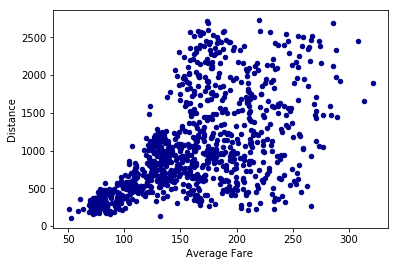

In [109]:
#Create scatter Plot of Independent Variable vs Dependent Variable
ax1 = data_o.plot.scatter(x='Average Fare ',y='Distance', c='DarkBlue')

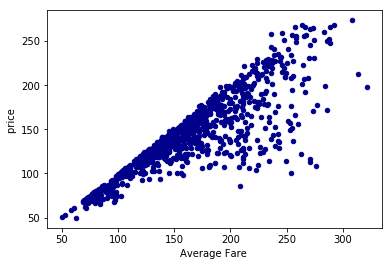

In [110]:
#Create scatter Plot of Independent Variable vs Dependent Variable
  ax2 = data_o.plot.scatter(x='Average Fare ',y='price ', c='DarkBlue')

In [0]:

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [112]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_regressor.coef_[0][idx]))

The coefficient for Average Fare  is 1.1366197326863348
The coefficient for Distance is -0.0015485614045845728
The coefficient for Average weekly passengers is 0.002851461693504956
The coefficient for market share  is 0.01289859557008012
The coefficient for market share .1 is -0.07570730908031131
The coefficient for price  is -0.0814430646852034


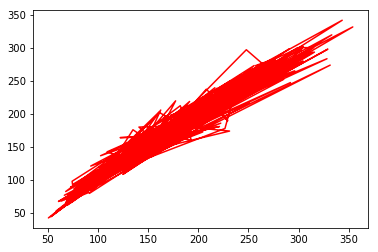

In [113]:
plt.plot(y, Y_pred, color='red')
plt.show()


In [0]:
r_sq = linear_regressor.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9661081824734021


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
intercept = linear_regressor.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.234372769859277


In [115]:
linear_regressor.score(X_test, y_test)

0.9600795812532257